In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [2]:
df = pd.read_csv(
    '/home/abel/Documents/solar-challenge-week1/data/sierraleone-bumbuna.csv')

In [3]:
df.drop(['Comments', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')

In [4]:
df.nunique()

Timestamp        525600
GHI                8742
DNI                8205
DHI                7183
ModA              10188
ModB               8524
Tamb                276
RH                  902
WS                  145
WSgust               88
WSstdev              40
WD                 3601
WDstdev             712
BP                   14
Cleaning              2
Precipitation        24
TModA               620
TModB               572
dtype: int64

In [5]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

### Summary Statistics & Missing-Value

In [8]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161


In [9]:
df.isna().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [10]:
null_percentage = df.isna().mean() * 100
columns_over_5pct_nulls = null_percentage[null_percentage > 5].index.tolist()
print("Columns with >5% nulls:", columns_over_5pct_nulls)

Columns with >5% nulls: []


### Data Cleaning and Outlier Detection

- Flagging and removing outliers (Z-score > 3)
- Cleaning sensor and wind speed data
- Exporting the cleaned dataset


In [11]:
# Computing z-scores
# key_columns = df.columns
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_columns].apply(zscore)

# Outlier detection
outliers_per_column = (np.abs(z_scores) > 3).sum()
print(outliers_per_column)

GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64


In [12]:
# Calculate min, max, and mean for each KPI
stats = df[key_columns].agg(['min', 'max', 'mean']).round(2)
print(stats)

          GHI     DNI     DHI     ModA     ModB     WS  WSgust
min    -19.50   -7.80  -17.90     0.00     0.00   0.00    0.00
max   1499.00  946.00  892.00  1507.00  1473.00  19.20   23.90
mean   201.96  116.38  113.72   206.64   198.11   1.15    1.69


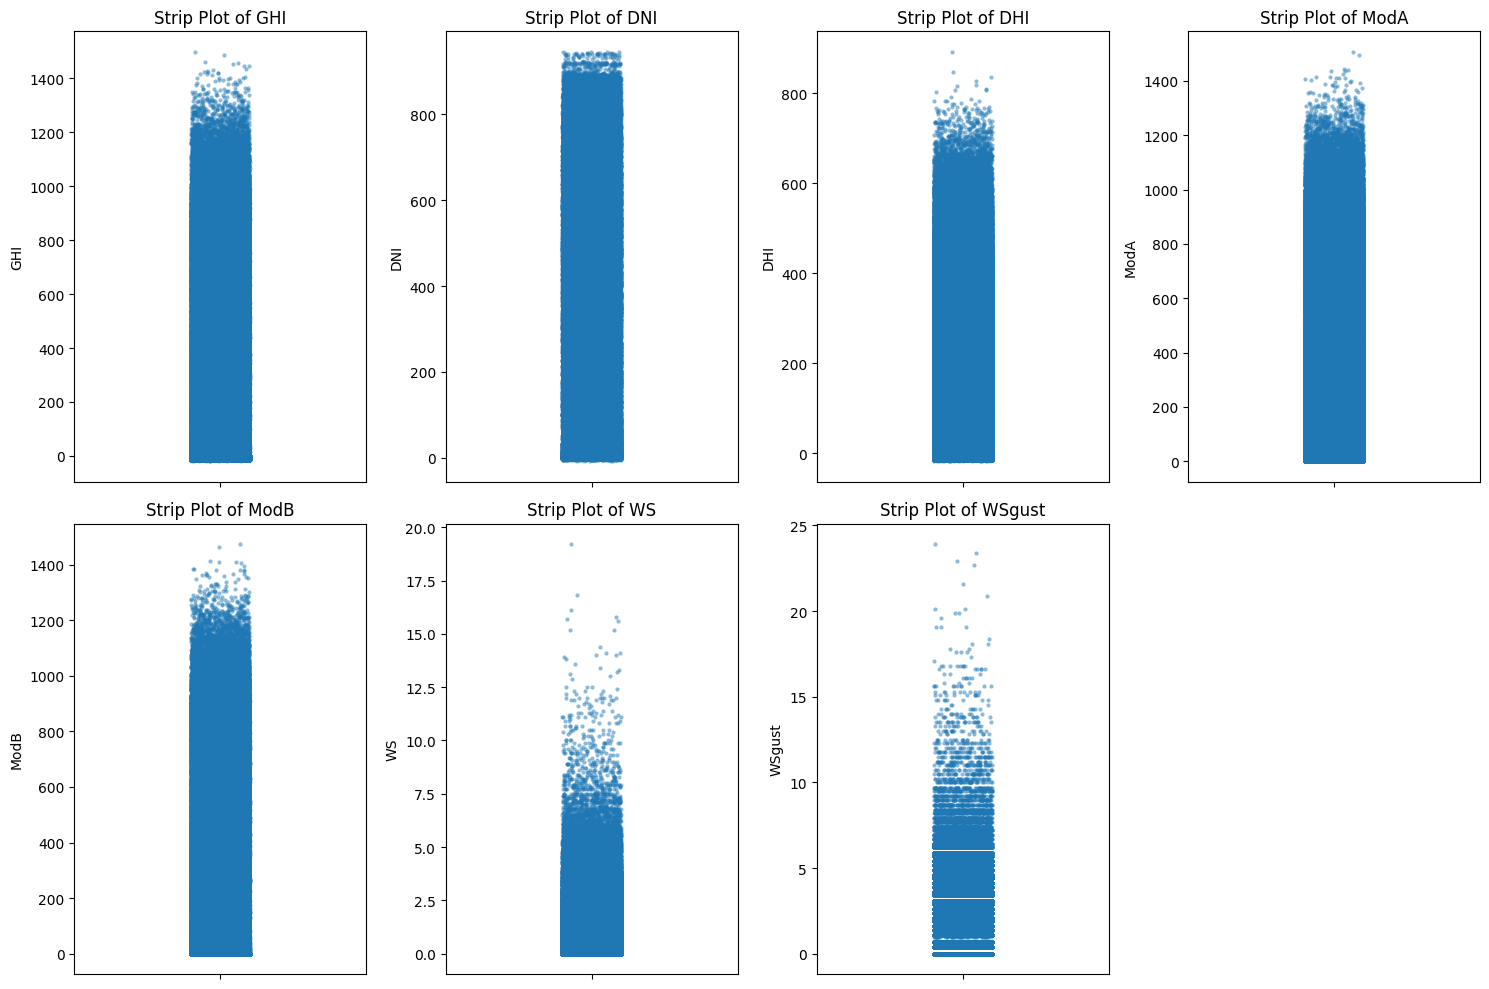

In [13]:
plt.figure(figsize=(15, 10))

# Create a strip plot for each KPI
for i, key_column in enumerate(key_columns, 1):
    plt.subplot(2, 4, i)
    sns.stripplot(data=df, y=key_column, jitter=True, alpha=0.5, size=3)
    plt.title(f'Strip Plot of {key_column}')
    plt.ylabel(key_column)

plt.tight_layout()
plt.show()

In [14]:
columns_to_cap = {
    'GHI': (0, 1200),
    'DNI': (0, 970),
    'DHI': (0, 670),
    'ModA': (0, 1180),
    'ModB': (0, 1180),
    'WS': (0, 30),
    'WSgust': (0, 40),
    'Tamb': (-20, 50),
    'RH': (0, 100)
}

for column, (min_val, max_val) in columns_to_cap.items():
    if column in df.columns:
        # Count values before capping
        below_min = (df[column] < min_val).sum()
        above_max = (df[column] > max_val).sum()

        # Cap the values
        df[column] = df[column].clip(lower=min_val, upper=max_val)

# Export the updated DataFrame
df.to_csv(
    '/home/abel/Documents/solar-challenge-week1/data/togo_clean.csv', index=False)
print("\nCleaned and capped DataFrame exported to 'data/togo_clean.csv'")


Cleaned and capped DataFrame exported to 'data/togo_clean.csv'


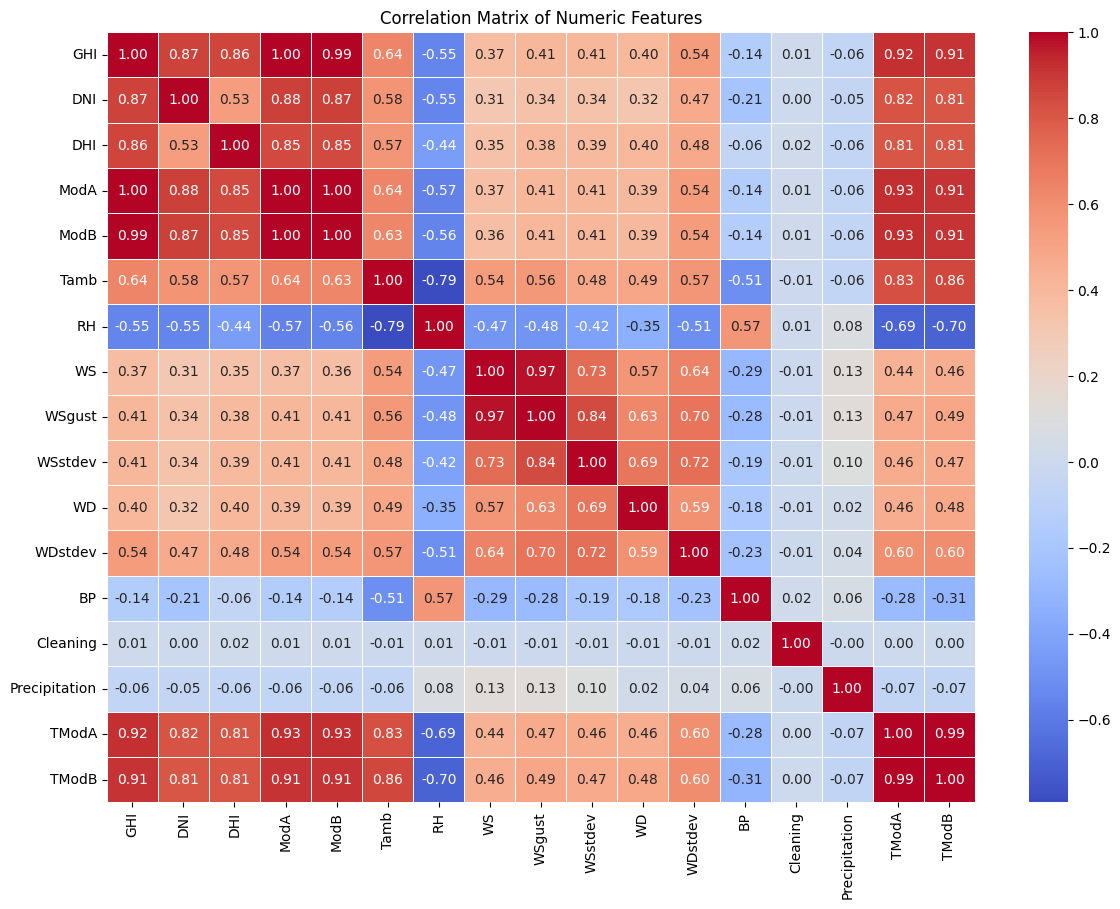

In [15]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

### Time Series Analysis

/tmp/ipykernel_34260/1531463189.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


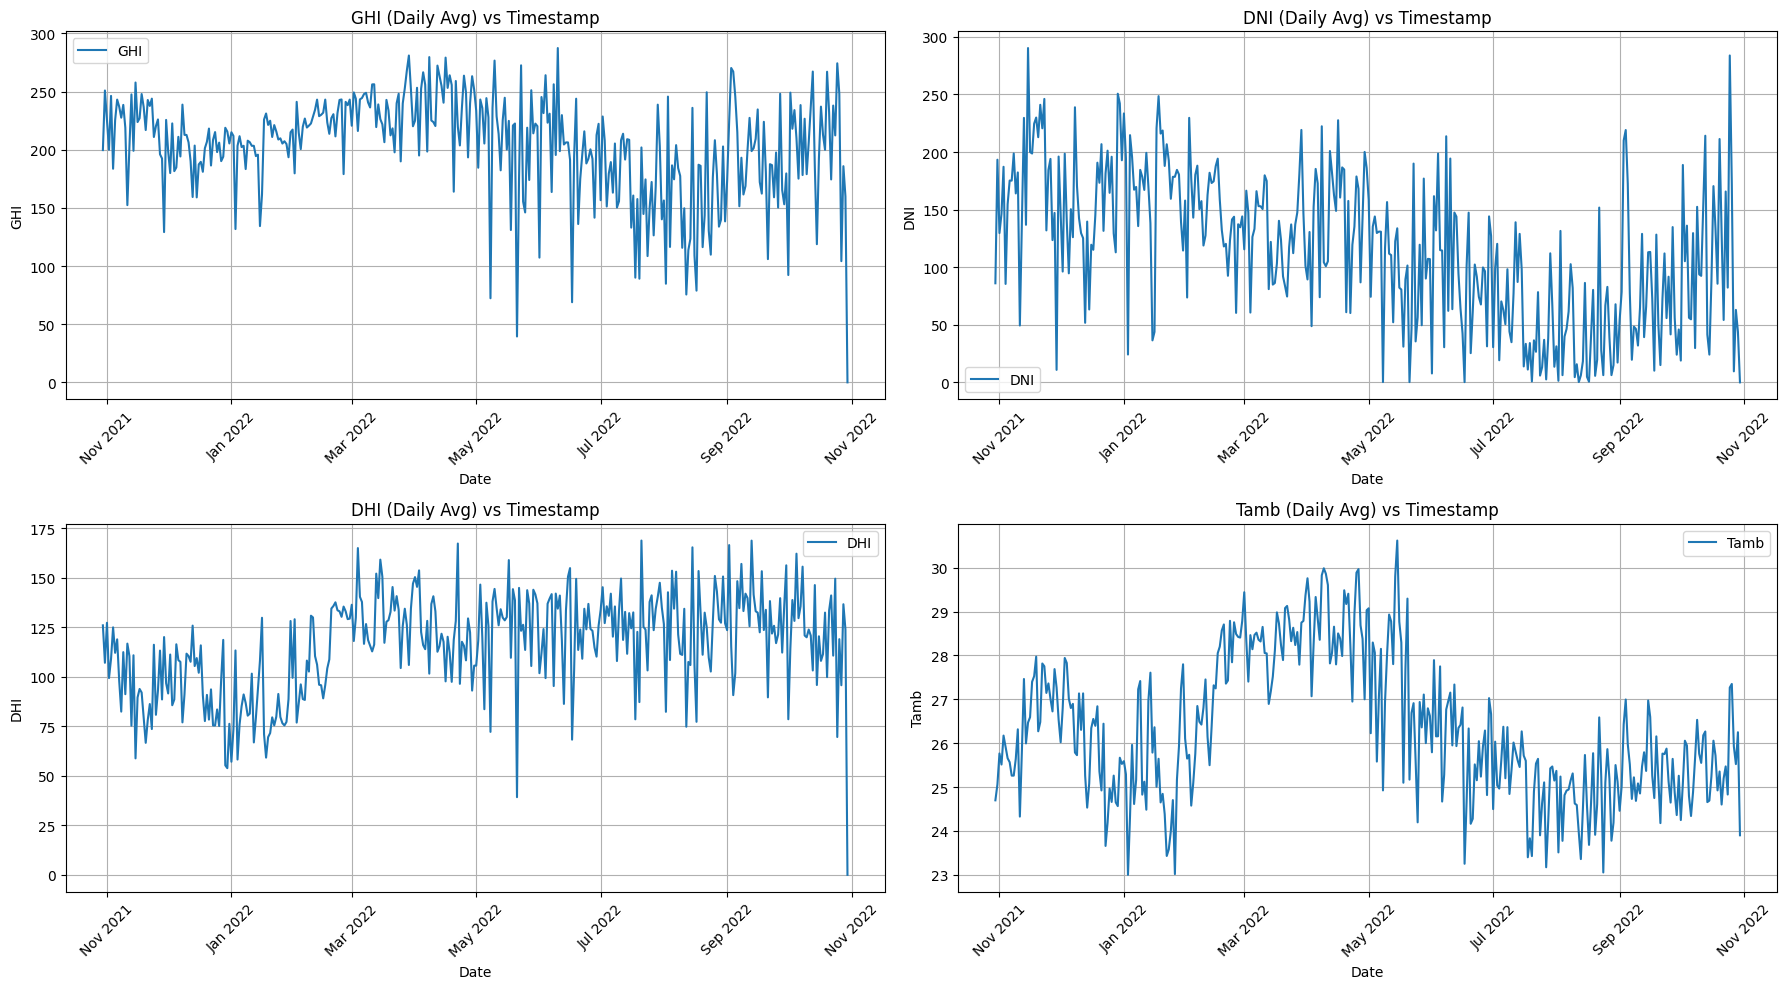

In [16]:
if 'Timestamp' not in df.columns and df.index.name == 'Timestamp':
    df.reset_index(inplace=True)
    df.set_index('Timestamp', inplace=True)
elif 'Timestamp' in df.columns:
    df.set_index('Timestamp', inplace=True)

# Daily mean
df_daily = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()

# Monthly mean (for broader seasonal trends)
df_monthly = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()

plt.figure(figsize=(18, 10))
columns = ['GHI', 'DNI', 'DHI', 'Tamb']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(df_daily.index, df_daily[col], label=col, color='tab:blue')
    plt.title(f'{col} (Daily Avg) vs Timestamp')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()

### Cleaning Impact on ModA & ModB

   Cleaning        ModA        ModB
0         0  206.506612  197.994306
1         1  273.309252  277.231102


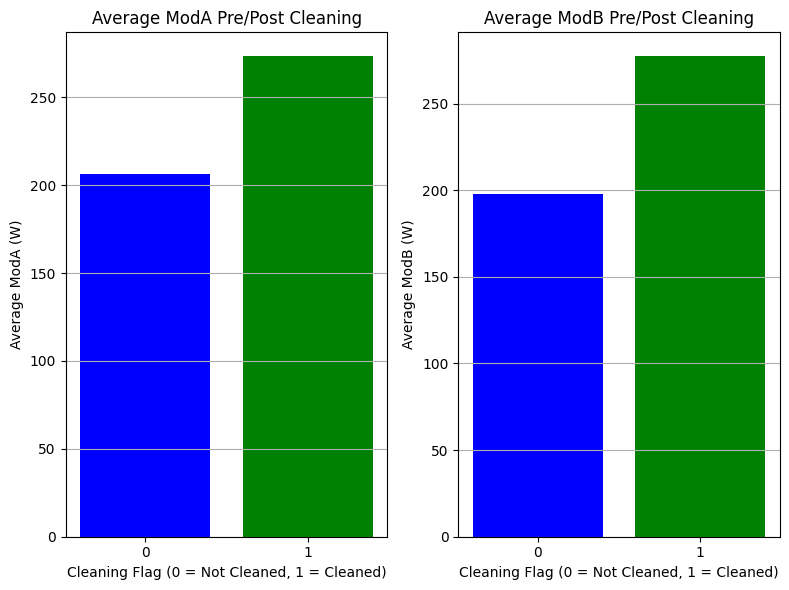

In [17]:
# Group by Cleaning flag and calculate mean of ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
print(cleaning_impact)

# Plot bar chart for ModA and ModB
plt.figure(figsize=(8, 6))

# Bar chart for ModA
plt.subplot(1, 2, 1)
plt.bar(cleaning_impact['Cleaning'].astype(str),
        cleaning_impact['ModA'], color=['blue', 'green'])
plt.title('Average ModA Pre/Post Cleaning')
plt.xlabel('Cleaning Flag (0 = Not Cleaned, 1 = Cleaned)')
plt.ylabel('Average ModA (W)')
plt.grid(True, axis='y')

# Bar chart for ModB
plt.subplot(1, 2, 2)
plt.bar(cleaning_impact['Cleaning'].astype(str),
        cleaning_impact['ModB'], color=['blue', 'green'])
plt.title('Average ModB Pre/Post Cleaning')
plt.xlabel('Cleaning Flag (0 = Not Cleaned, 1 = Cleaned)')
plt.ylabel('Average ModB (W)')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

### Correlation & Relationship Analysis
- Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
- Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.


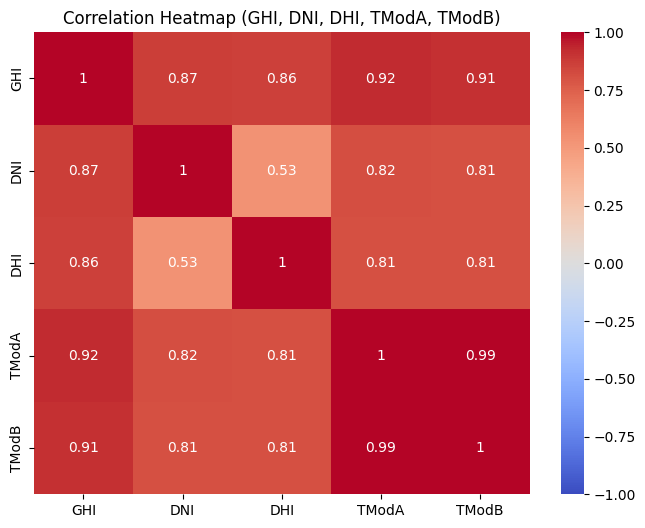

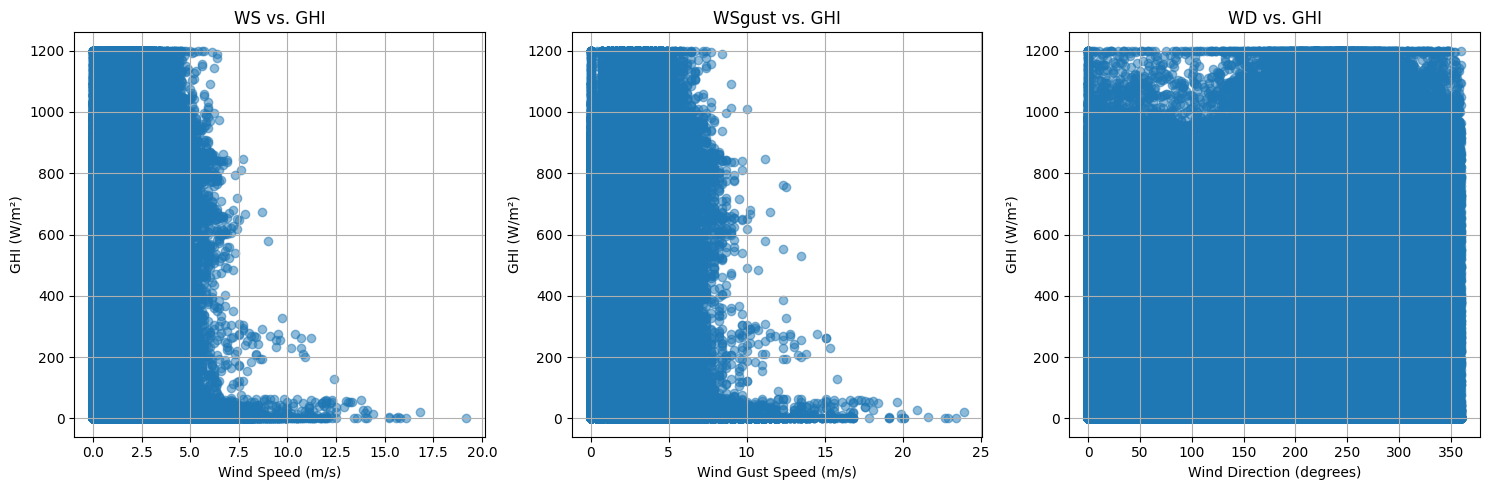

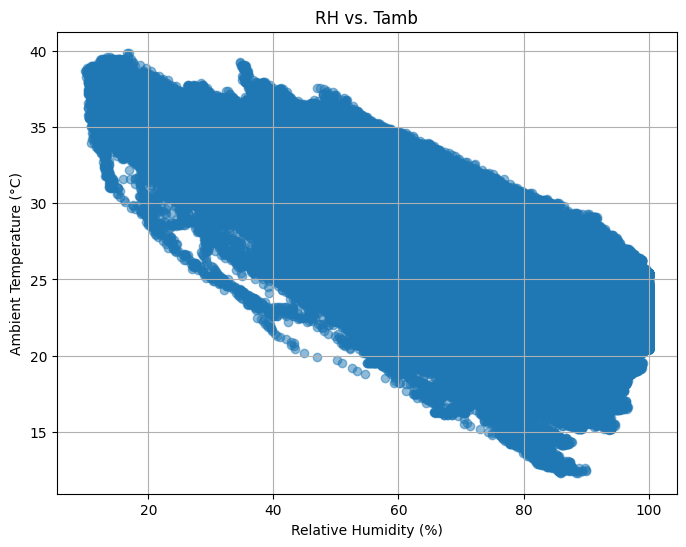

In [18]:
# Heatmap of correlations for GHI, DNI, DHI, TModA, TModB
columns_for_heatmap = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[columns_for_heatmap].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (GHI, DNI, DHI, TModA, TModB)')
plt.show()

# Scatter plots
plt.figure(figsize=(15, 5))

# WS vs. GHI
plt.subplot(1, 3, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.title('WS vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# WSgust vs. GHI
plt.subplot(1, 3, 2)
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5)
plt.title('WSgust vs. GHI')
plt.xlabel('Wind Gust Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# WD vs. GHI
plt.subplot(1, 3, 3)
plt.scatter(df['WD'], df['GHI'], alpha=0.5)
plt.title('WD vs. GHI')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Scatter plot for RH vs. Tamb (or RH vs. GHI if Tamb is unavailable)
plt.figure(figsize=(8, 6))

if 'Tamb' in df.columns:
    plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
    plt.title('RH vs. Tamb')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Ambient Temperature (°C)')
else:
    print("Tamb column not found. Plotting RH vs. GHI instead.")
    plt.scatter(df['RH'], df['GHI'], alpha=0.5)
    plt.title('RH vs. GHI')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('GHI (W/m²)')

plt.grid(True)
plt.show()

### Wind & Distribution Analysis
- Wind rose or radial bar plot of WS/WD.
- Histograms for GHI and one other variable (e.g. WS).


/tmp/ipykernel_34260/450491638.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_data = df.groupby(wd_binned)['WS'].mean().reindex(labels[:-1])


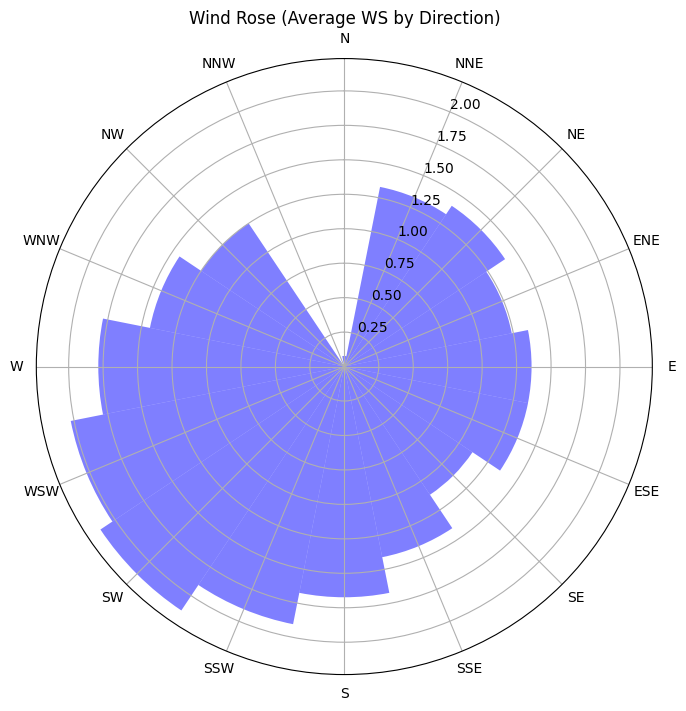

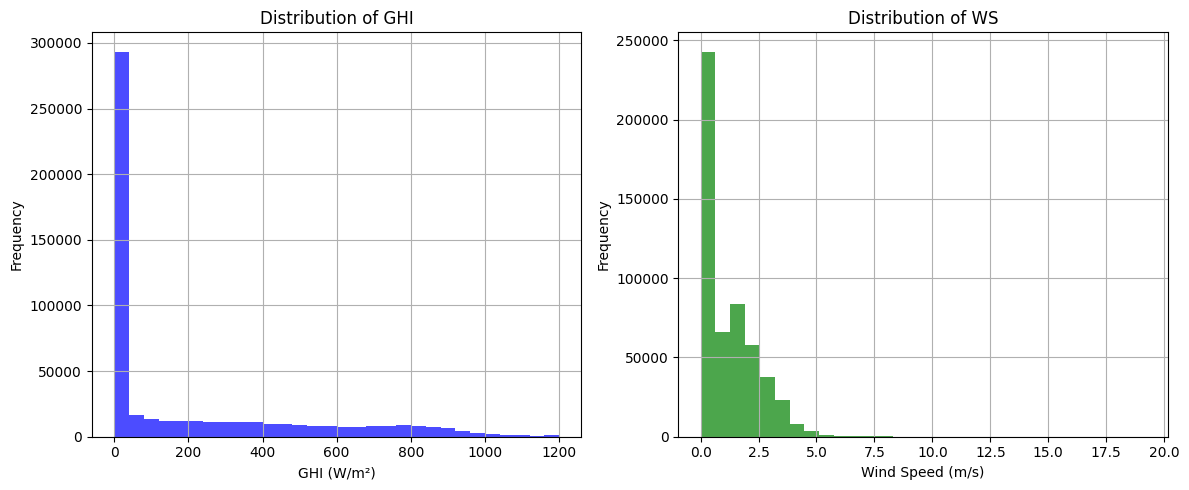

In [ ]:
# Wind Rose Plot for WS and WD
wd_radians = np.radians(df['WD'])

# Define direction bins (every 22.5 degrees for 16 directions)
bins = np.arange(0, 2 * np.pi, np.pi / 8)  # 0, 22.5, 45, ..., 337.5, 360
labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
          'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

# Bin the wind directions
wd_binned = pd.cut(wd_radians, bins=bins,
                   labels=labels[:-1], include_lowest=True)

# Group by direction and calculate average WS
wind_data = df.groupby(wd_binned)['WS'].mean().reindex(labels[:-1])

# Create wind rose plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
bars = ax.bar(wind_data.index.map(lambda x: np.radians(np.arange(0, 360, 22.5)[labels.index(x)])),
              wind_data.values,
              width=np.pi/8,
              bottom=0.0,
              color='b',
              alpha=0.5)

# Customize the plot
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.radians(np.arange(0, 360, 22.5)))
ax.set_xticklabels(labels)
plt.title('Wind Rose (Average WS by Direction)')
plt.show()

# Step 2: Histograms for GHI and WS
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for WS
plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of WS')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

### Temperature Analysis


Correlations with RH:
RH      1.00
Tamb   -0.79
GHI    -0.55
DNI    -0.55
DHI    -0.44
Name: RH, dtype: float64


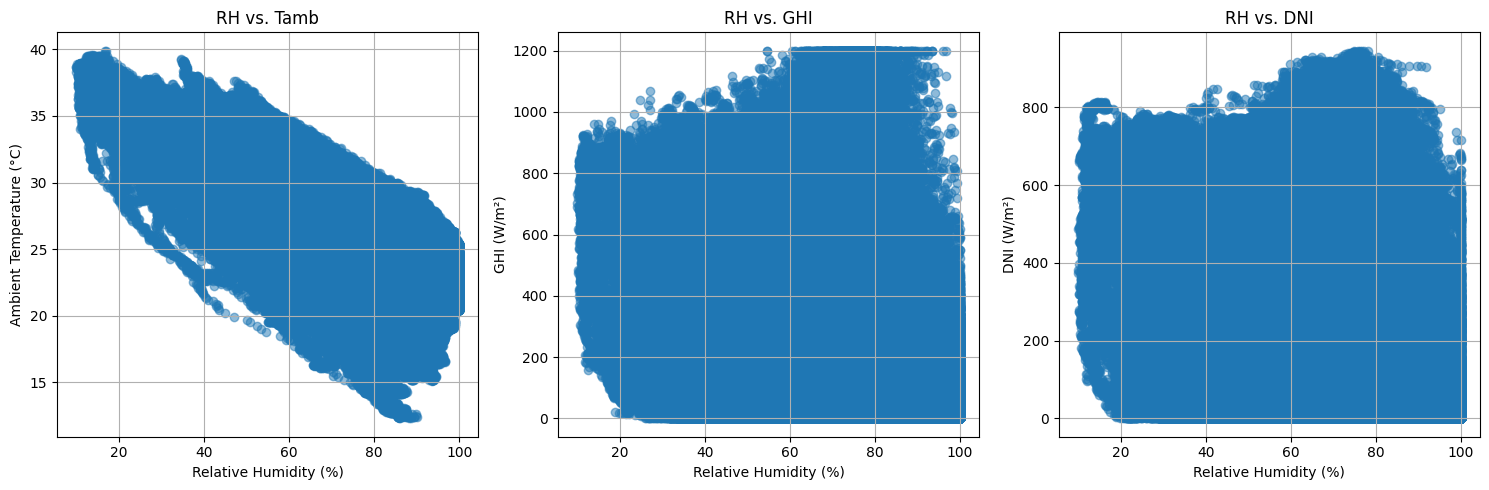

<Figure size 1500x500 with 0 Axes>

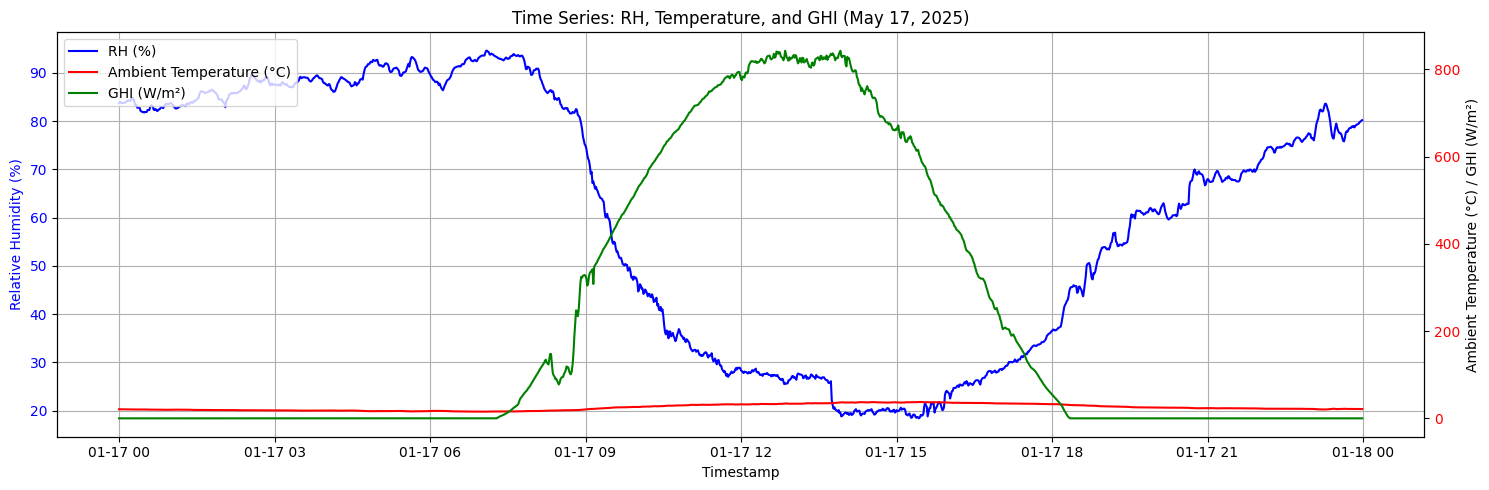

In [ ]:
# Check for Tamb; if unavailable, use TModA as a proxy
if 'Tamb' in df.columns:
    temp_column = 'Tamb'
    temp_label = 'Ambient Temperature (°C)'
else:
    temp_column = 'TModA'
    temp_label = 'Module Temperature (TModA, °C)'
    print("Tamb column not found. Using TModA as a proxy for temperature.")

# Step 1: Compute correlations
columns_for_corr = ['RH', temp_column, 'GHI', 'DNI', 'DHI']
correlation_matrix = df[columns_for_corr].corr()

# Display correlations involving RH
print("Correlations with RH:")
print(correlation_matrix['RH'].round(2))

# Scatter plots for RH vs. Temperature and RH vs. Solar Radiation
plt.figure(figsize=(15, 5))

# RH vs. Temperature
plt.subplot(1, 3, 1)
plt.scatter(df['RH'], df[temp_column], alpha=0.5)
plt.title(f'RH vs. {temp_column}')
plt.xlabel('Relative Humidity (%)')
plt.ylabel(temp_label)
plt.grid(True)

# RH vs. GHI
plt.subplot(1, 3, 2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.title('RH vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# RH vs. DNI
plt.subplot(1, 3, 3)
plt.scatter(df['RH'], df['DNI'], alpha=0.5)
plt.title('RH vs. DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Time series comparison 
subset = df.loc['2022-01-17'].copy()
plt.figure(figsize=(15, 5))

# Plot RH, Temperature, and GHI on the same plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot RH
ax1.plot(subset.index, subset['RH'], color='blue', label='RH (%)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Relative Humidity (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Plot Temperature on the second y-axis
ax2 = ax1.twinx()
ax2.plot(subset.index, subset[temp_column], color='red', label=temp_label)
ax2.set_ylabel(temp_label, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Plot GHI on the second y-axis
ax2.plot(subset.index, subset['GHI'], color='green', label='GHI (W/m²)')
ax2.set_ylabel(temp_label + ' / GHI (W/m²)', color='black')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Time Series: RH, Temperature, and GHI (May 17, 2025)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

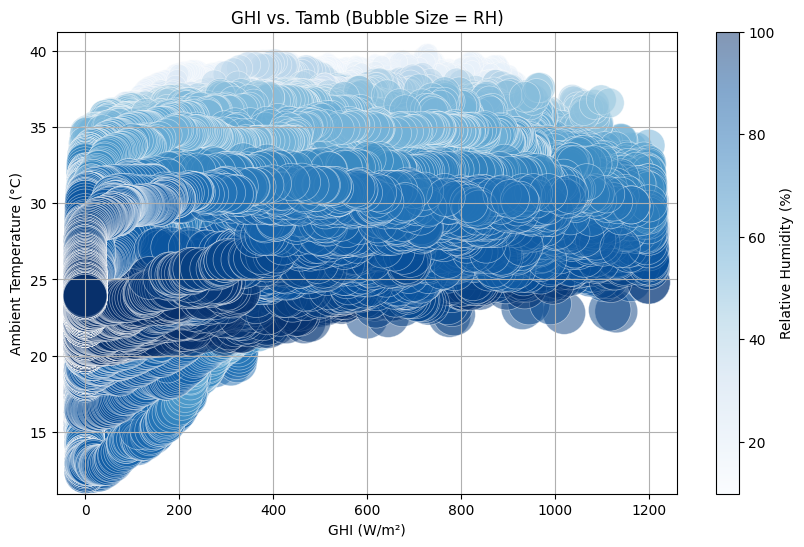

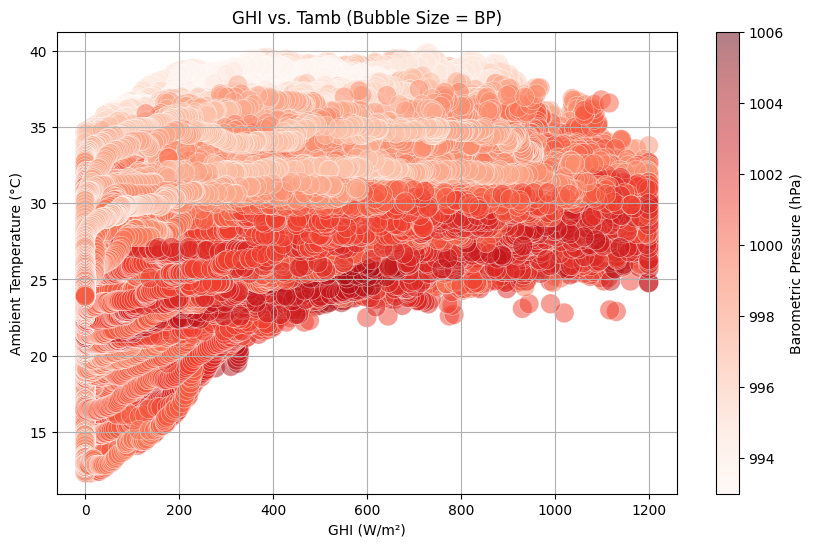

In [21]:
# Check for Tamb; if unavailable, use TModA as a proxy
if 'Tamb' in df.columns:
    temp_column = 'Tamb'
    temp_label = 'Ambient Temperature (°C)'
else:
    temp_column = 'TModA'
    temp_label = 'Module Temperature (TModA, °C)'
    print("Tamb column not found. Using TModA as a proxy for temperature.")

# Bubble Chart with Bubble Size = RH
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['GHI'], df[temp_column],
                      s=df['RH']*10,  # Scale bubble size for visibility
                      c=df['RH'],     # Color by RH
                      cmap='Blues',   # Color map for RH
                      alpha=0.5,
                      edgecolors='w',
                      linewidth=0.5)
plt.colorbar(scatter, label='Relative Humidity (%)')
plt.title(f'GHI vs. {temp_column} (Bubble Size = RH)')
plt.xlabel('GHI (W/m²)')
plt.ylabel(temp_label)
plt.grid(True)
plt.show()

# Bubble Chart with Bubble Size = BP (if available)
if 'BP' in df.columns:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['GHI'], df[temp_column],
                          s=(df['BP']-900)*2,
                          c=df['BP'],
                          cmap='Reds',
                          alpha=0.5,
                          edgecolors='w',
                          linewidth=0.5)
    plt.colorbar(scatter, label='Barometric Pressure (hPa)')
    plt.title(f'GHI vs. {temp_column} (Bubble Size = BP)')
    plt.xlabel('GHI (W/m²)')
    plt.ylabel(temp_label)
    plt.grid(True)
    plt.show()
else:
    print("BP column not found. Skipping BP bubble chart.")